In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
mercedes_data = pd.read_csv('train.csv',index_col='ID')

In [12]:
mercedes_data.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
6,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
7,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
9,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
13,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
mercedes_data.shape

(4209, 377)

In [14]:
mercedes_data.isna().any()

y       False
X0      False
X1      False
X2      False
X3      False
X4      False
X5      False
X6      False
X8      False
X10     False
X11     False
X12     False
X13     False
X14     False
X15     False
X16     False
X17     False
X18     False
X19     False
X20     False
X21     False
X22     False
X23     False
X24     False
X26     False
X27     False
X28     False
X29     False
X30     False
X31     False
        ...  
X355    False
X356    False
X357    False
X358    False
X359    False
X360    False
X361    False
X362    False
X363    False
X364    False
X365    False
X366    False
X367    False
X368    False
X369    False
X370    False
X371    False
X372    False
X373    False
X374    False
X375    False
X376    False
X377    False
X378    False
X379    False
X380    False
X382    False
X383    False
X384    False
X385    False
Length: 377, dtype: bool

In [17]:
mercedes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4209 entries, 0 to 8417
Columns: 377 entries, y to X385
dtypes: float64(1), int64(368), object(8)
memory usage: 12.1+ MB


In [18]:
mercedes_data.describe()

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1. We will check the null values if any in the dataset. We can do this with the help of a heatmap.

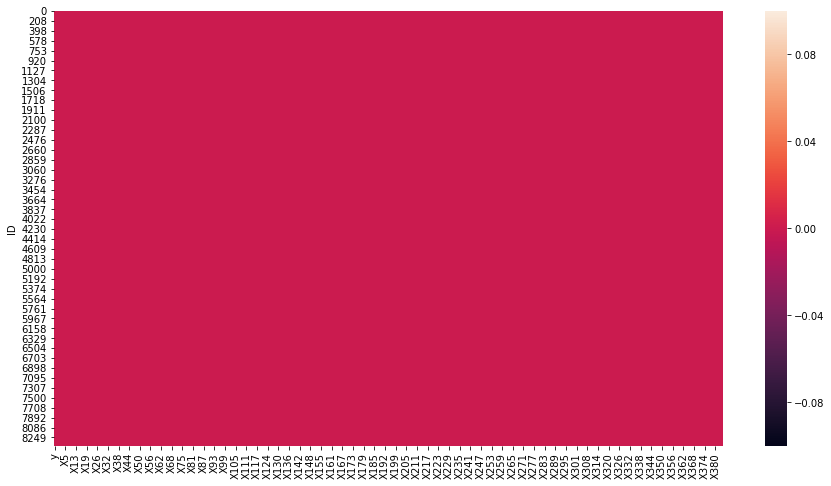

In [30]:
xlables=mercedes_data.columns
plt.figure(figsize=(15,8))
sns.heatmap(mercedes_data.isnull())
plt.show()

So from the above plot we can see that there are no null variables in the dataset.

We will check the variance and if it is equal to 0 then we will remove those variables.

In [75]:
mercedes_data.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
6,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
7,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
9,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
13,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
y=mercedes_data['y']
df_x1=mercedes_data.iloc[:,1:9]
df_x2=mercedes_data.iloc[:,10:]

In [83]:
mercedes_data.iloc[:,1:9].head()

,X0,X1,X2,X3,X4,X5,X6,X8
ID,,,,,,,,
0,k,v,at,a,d,u,j,o
6,k,t,av,e,d,y,l,o
7,az,w,n,c,d,x,j,x
9,az,t,n,f,d,x,l,e
13,az,v,n,f,d,h,d,n


In [84]:
df_x2.shape

(4209, 367)

In [86]:
from sklearn.feature_selection import VarianceThreshold
thresholder=VarianceThreshold(threshold=0.00)
var_data = thresholder.fit_transform(df_x2)

df_x2=df_x2.iloc[:,thresholder.get_support()]
print(df_x2.shape)
df_x2.head()

(4209, 355)


,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df_x2.X14.unique()

array([0, 1], dtype=int64)

In [91]:
df_x2.describe()

,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,0.099549,0.142789,0.002613,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,0.299433,0.349899,0.051061,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
df_x1.head()

,X0,X1,X2,X3,X4,X5,X6,X8
ID,,,,,,,,
0,k,v,at,a,d,u,j,o
6,k,t,av,e,d,y,l,o
7,az,w,n,c,d,x,j,x
9,az,t,n,f,d,x,l,e
13,az,v,n,f,d,h,d,n


In [93]:
df_x1['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [276]:
df_x2.corr().head()

,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
X12,1.000000,0.214825,-0.246513,-0.006212,-0.014584,-0.024937,-0.025327,-0.094730,-0.116280,-0.014584,...,-0.107864,-0.070214,0.030134,-0.016043,-0.027907,-0.005566,-0.024937,-0.011628,-0.006212,-0.010765
X13,0.214825,1.000000,-0.083141,-0.005409,-0.012698,-0.021713,-0.010525,-0.082482,-0.043126,0.007215,...,-0.169721,-0.061136,0.357229,-0.036040,-0.024299,0.023045,-0.021713,-0.010125,0.041242,-0.009373
X14,-0.246513,-0.083141,1.000000,-0.018865,-0.044291,0.012713,-0.076916,-0.287691,-0.353137,-0.044291,...,0.118950,0.026496,-0.097464,-0.037958,0.103309,0.007743,0.012713,0.023604,0.025199,0.043667
X15,-0.006212,-0.005409,-0.018865,1.000000,-0.001116,-0.001908,-0.001938,-0.007250,-0.008899,-0.001116,...,-0.014917,-0.005373,0.032168,-0.003168,-0.002136,-0.001968,-0.001908,-0.000890,-0.000475,-0.000824
X16,-0.014584,-0.012698,-0.044291,-0.001116,1.000000,-0.004480,-0.004550,-0.017020,-0.020892,-0.002620,...,-0.025036,-0.012615,0.045461,-0.007437,-0.005014,-0.004619,-0.004480,-0.002089,-0.001116,-0.001934


In [96]:
df_X = pd.concat([df_x1,df_x2],axis=1)

In [97]:
df_X.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X12,X13,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,k,v,at,a,d,u,j,o,0,1,...,0,0,1,0,0,0,0,0,0,0
6,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
7,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
9,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
13,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df_reducedVariance=pd.concat([df_X,y],axis=1)
df_reducedVariance.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X12,X13,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,y
ID,,,,,,,,,,,,,,,,,,,,,
0,k,v,at,a,d,u,j,o,0,1,...,0,1,0,0,0,0,0,0,0,130.81
6,k,t,av,e,d,y,l,o,0,0,...,0,0,0,0,0,0,0,0,0,88.53
7,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,1,0,0,0,76.26
9,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,80.62
13,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,78.02


In [127]:
df_reducedVariance['X0'].head()

ID
0      k
6      k
7     az
9     az
13    az
Name: X0, dtype: object

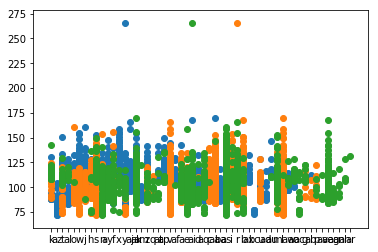

In [129]:
plt.scatter(df_reducedVariance['X0'],df_reducedVariance['y'])
plt.scatter(df_reducedVariance['X1'],df_reducedVariance['y'])
plt.scatter(df_reducedVariance['X2'],df_reducedVariance['y'])

In [264]:
df_reducedVariance.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X12,X13,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,k,v,at,a,d,u,j,o,0,1,...,0,0,1,0,0,0,0,0,0,0
6,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
7,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
9,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
13,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


In [265]:
# column_type=df_reducedVariance['X0'].dtype
# column_type[0]

df_reducedVariance.dtypes[df_reducedVariance.dtypes !='int64']


X0    object
X1    object
X2    object
X3    object
X4    object
X5    object
X6    object
X8    object
dtype: object

In [266]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_categorical=pd.DataFrame()
df_unique = pd.DataFrame()
df_features = pd.DataFrame()
#target_y = df_reducedVariance['y']
#df_reducedVariance.drop('y', axis=1,inplace=True)
cols=df_reducedVariance.columns.values


for column in cols:
    length=len(df_reducedVariance[column].unique())
    #print(length)
    if length > 2:
        df_categorical=pd.concat([df_categorical,df_reducedVariance[column]],axis=1)
    elif length == 2:
        df_features=pd.concat([df_features,df_reducedVariance[column]],axis=1)
    else:
        df_unique=pd.concat([df_unique,df_categorical[column]],axis=1)        


In [263]:
# df_categorical=df_categorical.apply(le.fit_transform)
# df_labelencoded=pd.concat([df_categorical,df_features], axis=1)
# print(df_labelencoded.shape)
# df_labelencoded.head(5)

(4209, 363)


,X0,X1,X2,X3,X4,X5,X6,X8,X12,X13,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,1,...,0,0,1,0,0,0,0,0,0,0
6,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
7,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
9,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
13,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [303]:
df_test=pd.read_csv('test.csv')
df_test.head()
df_test.head()
test_ID=df_test['ID']
df_test.drop('ID',axis=1,inplace=True)

cols=df_reducedVariance.columns.values

for column in cols:
    cardinality = len(df_reducedVariance[column].unique())
    if cardinality==1:
        df_reducedVariance.drop(column,axis=1,inplace=True)
        df_test.drop(column,axis=1,inplace=True)
    elif cardinality > 2:
        mapper=lambda x : sum([ord(digits) for digits in x])
        df_reducedVariance[column] = df_reducedVariance[column].apply(mapper)
        df_test[column] = df_test[column].apply(mapper)

In [304]:
df_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,219,118,110,102,100,116,97,119,0,0,...,0,0,0,1,0,0,0,0,0,0
1,116,98,202,97,100,98,103,121,0,0,...,0,0,1,0,0,0,0,0,0,0
2,219,118,212,102,100,97,106,106,0,0,...,0,0,0,1,0,0,0,0,0,0
3,219,108,110,102,100,122,108,110,0,0,...,0,0,0,1,0,0,0,0,0,0
4,119,115,212,99,100,121,105,109,0,0,...,1,0,0,0,0,0,0,0,0,0


In [299]:
df_reducedVariance.shape

(4209, 363)

In [275]:
from sklearn.decomposition import PCA
pca=PCA()
x_pca=pca.fit_transform(df_reducedVariance)
#pca.explained_variance_
x_pca.shape


(4209, 363)

In [280]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [285]:
X=df_reducedVariance.iloc[:,:]
y=mercedes_data['y']


In [311]:
df_test.drop(columns=['X10', 'X268', 'X297', 'X347', 'X107', 'X289', 'X93', 'X293', 'X235', 'X233', 'X290', 'X11', 'X330'],axis=1,inplace=True)

In [306]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

data_dmatrix = xgb.DMatrix(data=X,label=y)


In [315]:
#xgb_classi = xgb.XGBClassifier(objective='binary:logistic',colsample_bytree = 0.3,earning_rate = 0.1,max_depth = 10, alpha = 10, n_estimators = 10)
xgb_classi=xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
xgb_classi.fit(X,y)

[23:29:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=10, n_jobs=0, num_parallel_tree=1,
       objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
       scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [316]:
xgb_classi.predict(df_test)

array([50.83412, 61.57601, 50.83412, ..., 62.10399, 72.88872, 61.57601],
      dtype=float32)

In [320]:
preds=xgb_classi.predict(df_test)

In [321]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y, preds))
rmse

37.474461466255505

In [322]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 10, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[23:34:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[23:34:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[23:34:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [323]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,91.016571,0.040950,91.014091,0.091074
1,82.038910,0.023022,82.027102,0.091357
2,73.944222,0.029159,73.926771,0.093910
3,66.670484,0.035408,66.659335,0.103128
4,60.136413,0.036210,60.131013,0.110994


In [324]:
print((cv_results["test-rmse-mean"]).tail(1))

49    8.535626
Name: test-rmse-mean, dtype: float64


In [326]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

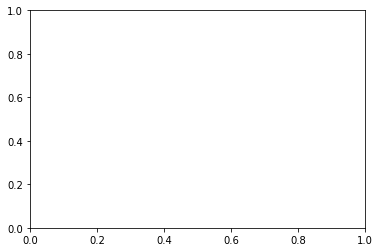

In [327]:
xgb.plot_tree(xgb_classi,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [329]:
jupyter notebook --generate-config

SyntaxError: invalid syntax (<ipython-input-329-ce48075e8c16>, line 1)